Hola **Eduardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### Datos

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/94210e31-fd3d-451b-a350-4a8476756413/final_provider.zip)

Los datos también se encuentran en la plataforma, en la carpeta `/datasets/final_provider/`.


# 1. Plan de trabajo

Deberás realizar un análisis exploratorio de datos. Al final de *Jupyter Notebook*, escribe:

- Una lista de preguntas aclaratorias.
- Un plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados

El líder del equipo revisará tus preguntas y plan de trabajo. Las preguntas serán respondidas durante una videollamada. El código será revisado por el líder del equipo solo si hay algunas dudas.


In [55]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile
import os

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score)
from sklearn.compose import ColumnTransformer


In [56]:
# Ruta al archivo zip cargado y al directorio de extracción
zip_file_path = 'datasets/final_provider.zip'
extraction_dir = 'datasets/final_provider/'

# Extrae el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Enumere los archivos extraídos para confirmar la extracción
os.listdir(extraction_dir)

['final_provider',
 'internet.csv',
 'contract.csv',
 '__MACOSX',
 'phone.csv',
 'personal.csv']

In [57]:
# Ruta al directorio principal de datos
data_dir = os.path.join(extraction_dir, 'final_provider')

# Listar los archivos en el directorio principal.
os.listdir(data_dir)

['internet.csv', 'contract.csv', 'phone.csv', 'personal.csv']

In [58]:
# Cargar y mostrar las primeras filas de cada archivo
files = ['personal.csv', 'contract.csv', 'phone.csv', 'internet.csv']
dataframes = {}

for file in files:
    file_path = os.path.join(data_dir, file)
    dataframes[file] = pd.read_csv(file_path)
    print(f"Preview of {file}:")
    print(dataframes[file].head(), dataframes[file].info())
    print("\n")


    # Verificar valores nulos y tipos de datos
for file, df in dataframes.items():
    print(f"Análisis de {file}:")
    print(df.isnull().sum())
    print("\n")


Preview of personal.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No None


Preview of contract.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dty

In [59]:
# Limpieza preliminar de datos
# Convertir 'TotalCharges' a numérico y manejar errores
contract_df = dataframes['contract.csv']
contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'], errors='coerce')


# Reemplazar nulos resultantes de la conversión
contract_df['TotalCharges'].fillna(contract_df['MonthlyCharges'], inplace=True)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance con la exploración inicial de los datos a utilizar, hiciste una correcta limpieza de tus datos
</div>

In [60]:
# Comprobar valores únicos en columnas categóricas clave
for col in ['gender', 'Partner', 'Dependents']:
    print(f"Valores únicos en {col}:", dataframes['personal.csv'][col].unique())

Valores únicos en gender: ['Female' 'Male']
Valores únicos en Partner: ['Yes' 'No']
Valores únicos en Dependents: ['No' 'Yes']


In [61]:
# Unificar los conjuntos de datos en un único DataFrame
merged_data = dataframes['personal.csv']
for file in ['contract.csv', 'phone.csv', 'internet.csv']:
    merged_data = merged_data.merge(dataframes[file], on='customerID', how='left')

In [62]:
# Verificar si hay valores nulos tras la unificación
print("Valores nulos tras la unificación:")
print(merged_data.isnull().sum())

Valores nulos tras la unificación:
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64


In [63]:
# Análisis exploratorio
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
print(merged_data.describe())

Estadísticas descriptivas de variables numéricas:
       SeniorCitizen  MonthlyCharges  TotalCharges
count    7043.000000     7043.000000   7043.000000
mean        0.162147       64.761692   2279.798992
std         0.368612       30.090047   2266.730170
min         0.000000       18.250000     18.800000
25%         0.000000       35.500000    398.550000
50%         0.000000       70.350000   1394.550000
75%         0.000000       89.850000   3786.600000
max         1.000000      118.750000   8684.800000


In [64]:
# Distribución de la variable objetivo (EndDate)
print("Distribución de 'EndDate':")
print(merged_data['EndDate'].value_counts())

Distribución de 'EndDate':
EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64


In [65]:
# Distribución de clientes según tipo de servicio de internet
print("Distribución de 'InternetService':")
print(merged_data['InternetService'].value_counts())

Distribución de 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64


In [66]:
# 1. Limpieza y tratamiento de valores nulos
# Asegurarnos de que no queden valores nulos en 'TotalCharges' y reemplazarlos
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')
merged_data['TotalCharges'].fillna(merged_data['MonthlyCharges'], inplace=True)

# Rellenar valores faltantes en columnas categóricas con "No"
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies']

for col in categorical_columns:
    merged_data[col].fillna('No', inplace=True)

In [67]:
# Verificar si quedan valores nulos
print("Valores nulos restantes:")
print(merged_data.isnull().sum())

Valores nulos restantes:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [68]:
# 2. Conversión y codificación de datos categóricos
# Convertir columnas categóricas binarias a formato numérico
binary_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling']
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1}
for col in binary_columns:
    merged_data[col] = merged_data[col].map(binary_mapping)

In [69]:
# Codificar variables categóricas con múltiples niveles usando OneHotEncoder
multi_level_columns = ['PaymentMethod', 'Type', 'InternetService']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(
    encoder.fit_transform(merged_data[multi_level_columns]),
    columns=encoder.get_feature_names_out(multi_level_columns)
)

In [70]:
# Agregar las características codificadas y eliminar las originales
merged_data = pd.concat([merged_data.drop(columns=multi_level_columns), encoded_features], axis=1)

# 3. Escalado de variables numéricas
# Escalar 'MonthlyCharges' y 'TotalCharges'
scaler = StandardScaler()
merged_data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(merged_data[['MonthlyCharges', 'TotalCharges']])

In [71]:
# Verificar el DataFrame procesado
print("Vista previa de los datos procesados:")
print(merged_data.head())

Vista previa de los datos procesados:
   customerID  gender  SeniorCitizen  Partner  Dependents   BeginDate  \
0  7590-VHVEG       1              0        1           0  2020-01-01   
1  5575-GNVDE       0              0        0           0  2017-04-01   
2  3668-QPYBK       0              0        0           0  2019-10-01   
3  7795-CFOCW       0              0        0           0  2016-05-01   
4  9237-HQITU       1              0        0           0  2019-09-01   

               EndDate  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0                   No                 1       -1.160323     -0.992667  ...   
1                   No                 0       -0.259629     -0.172198  ...   
2  2019-12-01 00:00:00                 1       -0.362660     -0.958122  ...   
3                   No                 0       -0.746535     -0.193706  ...   
4  2019-11-01 00:00:00                 1        0.197365     -0.938930  ...   

  TechSupport StreamingTV StreamingMovies  \
0  

Limpieza de Datos:  

Se corrigieron los valores no numéricos en TotalCharges y se manejaron los valores nulos con valores predeterminados.
Se rellenaron columnas categóricas con valores faltantes asignándoles "No", lo cual es razonable para estas variables de servicio.  

Codificación de Datos:  

Las columnas binarias se mapearon directamente a valores 0 y 1.  

Las columnas con múltiples niveles se codificaron con OneHotEncoder, eliminando una categoría para evitar multicolinealidad.  

Escalado:  

Las variables numéricas MonthlyCharges y TotalCharges se escalaron usando StandardScaler para que tengan una media de 0 y una desviación estándar de 1, lo cual beneficia a ciertos modelos que son sensibles a la escala.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el preprocesamiento de tus datos, sin embargo te pediría revisar las celdas de Markdown que continúan con el plan de trabajo y las preguntas ya respondidas. Esto genera ruido en el notebook al seguir el proceso de análisis
</div>

### Lista de Preguntas Aclaratorias

¿Cuál es la interpretación específica de "EndDate" como característica objetivo? ¿Deberíamos codificarla como una variable binaria para modelado?  


Algunos clientes no tienen servicios de Internet o teléfono. ¿Debemos tratarlos de manera especial en el análisis o eliminar esas observaciones?  


¿Qué significa un valor faltante en columnas como InternetService o MultipleLines tras la unificación?  


¿Se debe realizar algún tratamiento particular para las columnas categóricas de múltiples niveles como PaymentMethod?


### Plan Aproximado

1.- Limpieza y Preprocesamiento de Datos:

Convertir columnas numéricas mal tipificadas (como TotalCharges).
Manejar valores nulos de forma adecuada según su naturaleza.

2.- Análisis Exploratorio de Datos (EDA):

Analizar las distribuciones de las variables principales.
Explorar la relación entre EndDate y otras variables.
Identificar correlaciones y posibles características relevantes.

3.- Codificación y Transformación de Datos:

Convertir variables categóricas a formato numérico (one-hot encoding o label encoding).
Escalar las variables numéricas si es necesario para los modelos.

4.- Preparación del Conjunto de Datos para Modelado:

Dividir los datos en conjuntos de entrenamiento, validación y prueba.
Garantizar un balance adecuado en la variable objetivo si está desbalanceada.

5.- Entrenamiento y Validación de Modelos:

Probar modelos básicos (logística, árboles de decisión).
Ajustar hiperparámetros y optimizar para maximizar el AUC-ROC.

In [72]:
# 1. Preparar la columna objetivo
# Transformar 'EndDate' en una variable binaria
merged_data['Churn'] = (merged_data['EndDate'] == 'No').astype(int)


# Verificar la distribución del objetivo
print("\nDistribución de la variable objetivo (Churn):")
print(merged_data['Churn'].value_counts(normalize=True))


Distribución de la variable objetivo (Churn):
Churn
1    0.73463
0    0.26537
Name: proportion, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando el balance de las clases, parece que efectivamente es un problema con datos desbalanceados
    
</div>

In [73]:
# Definir la característica objetivo
target = 'Churn'
X = merged_data.drop(columns=['EndDate', target])  # Eliminamos 'EndDate' ya que se convierte en el objetivo
y = merged_data[target]


# 2. Dividir datos en entrenamiento, validación y prueba
# Dividimos el conjunto en entrenamiento+validación (80%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Dividimos el conjunto de entrenamiento+validación en entrenamiento (70%) y validación (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)


#Idenftificar columnas no numéricas
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric_columns)

Columnas no numéricas: Index(['customerID', 'BeginDate', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')


In [74]:
# Revisar los valores unicos de las columnas problematicas
for column in non_numeric_columns:
    print(f"Valores únicos en {column}: {X_train[column].unique()}")

Valores únicos en customerID: ['2320-SLKMB' '4488-PSYCG' '7817-OMJNA' ... '7228-OMTPN' '1264-BYWMS'
 '8329-GWVPJ']
Valores únicos en BeginDate: ['2017-12-01' '2018-06-01' '2018-12-01' '2016-08-01' '2014-06-01'
 '2017-07-01' '2019-11-01' '2019-12-01' '2019-01-01' '2014-09-01'
 '2014-07-01' '2020-01-01' '2016-01-01' '2015-01-01' '2016-10-01'
 '2016-11-01' '2018-08-01' '2019-05-01' '2014-03-01' '2019-09-01'
 '2018-01-01' '2017-02-01' '2018-03-01' '2016-07-01' '2017-10-01'
 '2014-02-01' '2017-03-01' '2019-06-01' '2014-04-01' '2018-11-01'
 '2016-06-01' '2015-10-01' '2019-10-01' '2015-09-01' '2019-07-01'
 '2017-05-01' '2017-08-01' '2014-08-01' '2017-09-01' '2017-11-01'
 '2016-04-01' '2014-01-01' '2016-09-01' '2018-05-01' '2015-08-01'
 '2018-09-01' '2018-07-01' '2016-03-01' '2015-03-01' '2018-10-01'
 '2015-06-01' '2019-02-01' '2015-05-01' '2018-02-01' '2019-03-01'
 '2017-06-01' '2014-11-01' '2018-04-01' '2017-04-01' '2015-04-01'
 '2015-02-01' '2014-12-01' '2015-07-01' '2016-02-01' '2019-08-01

In [75]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[non_numeric_columns]))
X_train_encoded.index = X_train.index  # Ajustar el índice


# Combinar columnas codificadas con las demás numéricas
X_train = X_train.drop(non_numeric_columns, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)


# Verificar tamaños de los conjuntos
print(f"\nTamaños de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}, Prueba: {X_test.shape}")

/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Tamaños de los conjuntos:
Entrenamiento: (3943, 4048), Validación: (1691, 23), Prueba: (1409, 23)


### Siguientes pasos:

Dividir los datos en conjuntos de entrenamiento, validación y prueba.    
Realizar un análisis inicial de las características para determinar su correlación con el objetivo (churn).  
Entrenar un modelo base para evaluar métricas preliminares.  

In [76]:
# 1. Preparar la columna objetivo
# Transformar 'EndDate' en una variable binaria
merged_data['Churn'] = (merged_data['EndDate'] == 'No').astype(int)


# Verificar la distribución del objetivo
print("\nDistribución de la variable objetivo (Churn):")
print(merged_data['Churn'].value_counts(normalize=True))


Distribución de la variable objetivo (Churn):
Churn
1    0.73463
0    0.26537
Name: proportion, dtype: float64


In [77]:
# Definir la característica objetivo
target = 'Churn'
X = merged_data.drop(columns=['EndDate', target])  # Eliminamos 'EndDate' ya que se convierte en el objetivo
y = merged_data[target]

# 2. Dividir datos en entrenamiento, validación y prueba
# Dividimos el conjunto en entrenamiento+validación (80%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Dividimos el conjunto de entrenamiento+validación en entrenamiento (70%) y validación (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)


#Idenftificar columnas no numéricas
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric_columns)

Columnas no numéricas: Index(['customerID', 'BeginDate', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No deberías realizar el proceso de división más de una vez, pierdes procesos al hacerlo de esta manera
</div>

In [78]:
# Revisar los valores unicos de las columnas problematicas
for column in non_numeric_columns:
    print(f"Valores únicos en {column}: {X_train[column].unique()}")

Valores únicos en customerID: ['2320-SLKMB' '4488-PSYCG' '7817-OMJNA' ... '7228-OMTPN' '1264-BYWMS'
 '8329-GWVPJ']
Valores únicos en BeginDate: ['2017-12-01' '2018-06-01' '2018-12-01' '2016-08-01' '2014-06-01'
 '2017-07-01' '2019-11-01' '2019-12-01' '2019-01-01' '2014-09-01'
 '2014-07-01' '2020-01-01' '2016-01-01' '2015-01-01' '2016-10-01'
 '2016-11-01' '2018-08-01' '2019-05-01' '2014-03-01' '2019-09-01'
 '2018-01-01' '2017-02-01' '2018-03-01' '2016-07-01' '2017-10-01'
 '2014-02-01' '2017-03-01' '2019-06-01' '2014-04-01' '2018-11-01'
 '2016-06-01' '2015-10-01' '2019-10-01' '2015-09-01' '2019-07-01'
 '2017-05-01' '2017-08-01' '2014-08-01' '2017-09-01' '2017-11-01'
 '2016-04-01' '2014-01-01' '2016-09-01' '2018-05-01' '2015-08-01'
 '2018-09-01' '2018-07-01' '2016-03-01' '2015-03-01' '2018-10-01'
 '2015-06-01' '2019-02-01' '2015-05-01' '2018-02-01' '2019-03-01'
 '2017-06-01' '2014-11-01' '2018-04-01' '2017-04-01' '2015-04-01'
 '2015-02-01' '2014-12-01' '2015-07-01' '2016-02-01' '2019-08-01

In [79]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[non_numeric_columns]))
X_train_encoded.index = X_train.index  # Ajustar el índice


# Combinar columnas codificadas con las demás numéricas
X_train = X_train.drop(non_numeric_columns, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

/home/eduardobustamante/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
# Verificar tamaños de los conjuntos
print(f"\nTamaños de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}, Validación: {X_val.shape}, Prueba: {X_test.shape}")


Tamaños de los conjuntos:
Entrenamiento: (3943, 4048), Validación: (1691, 23), Prueba: (1409, 23)


Es necesario identificar las columnas catégoricas y excluirlas antes de calcular la matriz de correlación.

In [81]:
# 3. Análisis inicial de características
# Convertir la columna objetivo a numérica si es necesario
merged_data[target] = merged_data[target].astype(int)


# Identificar columnas categóricas y eliminarlas para la correlación
categorical_columns = merged_data.select_dtypes(include=['object']).columns
merged_data_numeric = merged_data.drop(columns=categorical_columns)


# Asegurar que 'EndDate' no está en los datos
if 'EndDate' in merged_data_numeric.columns:
    merged_data_numeric.drop(columns=['EndDate'], inplace=True)


# Calcular la correlación entre las variables numéricas
correlation = merged_data_numeric.corr()


# Mostrar correlación con el objetivo
print("\nCorrelación con el objetivo (Churn):")
print(correlation[target].sort_values(ascending=False))


Correlación con el objetivo (Churn):
Churn                                    1.000000
Type_Two year                            0.302253
InternetService_No                       0.227890
TotalCharges                             0.198347
Type_One year                            0.177820
Dependents                               0.164221
Partner                                  0.150448
PaymentMethod_Credit card (automatic)    0.134302
PaymentMethod_Mailed check               0.091683
gender                                  -0.008612
SeniorCitizen                           -0.150889
PaperlessBilling                        -0.191825
MonthlyCharges                          -0.193356
PaymentMethod_Electronic check          -0.301919
InternetService_Fiber optic             -0.308020
Name: Churn, dtype: float64


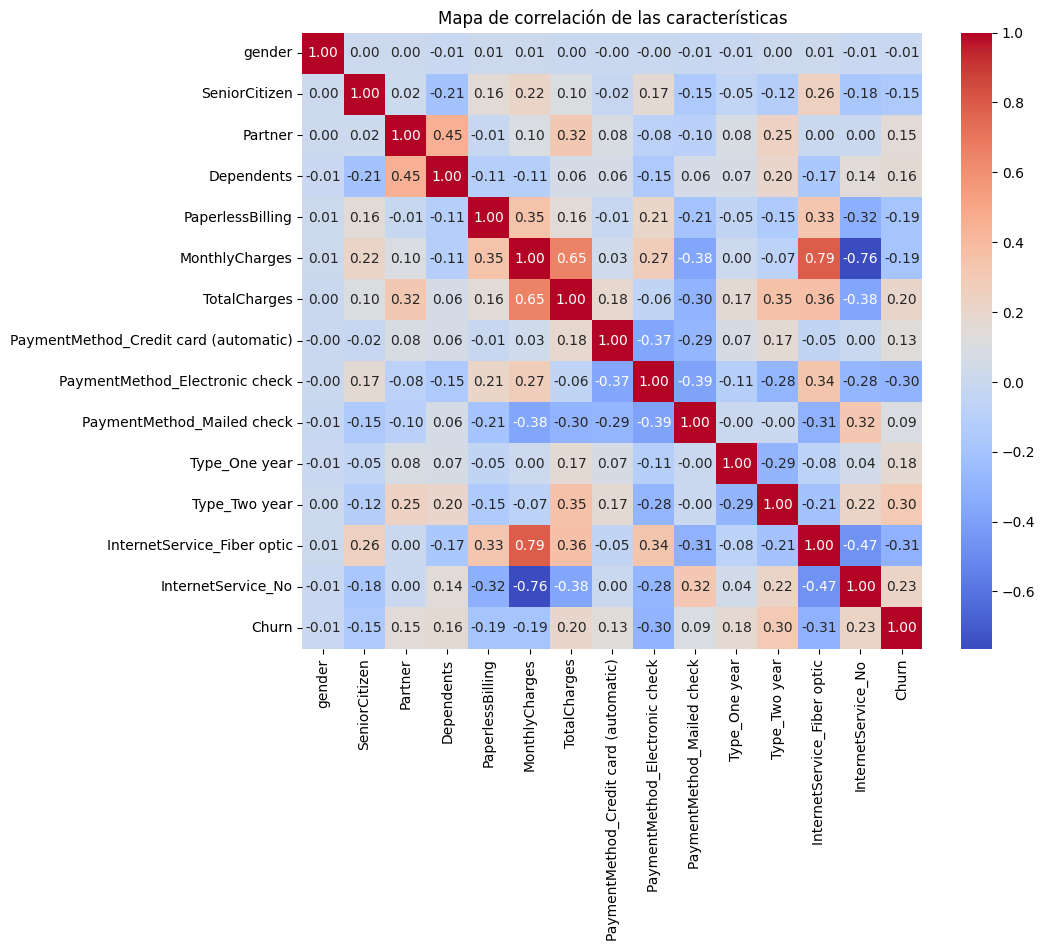

In [82]:
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación de las características")
plt.show()

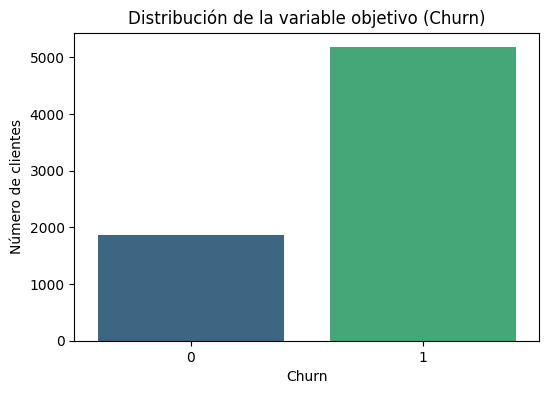

In [83]:
# Distribución del objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="viridis", hue=y, legend=False)
#sns.countplot(x=y, palette="viridis")
plt.title("Distribución de la variable objetivo (Churn)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

Se procede con el entrenamiento de un modelo base. Utilizando una regresión logística, ya que es simple, interpretable y adecuada para establecer métricas iniciales. 
Luego se evaluará el desempeño del modelo utilizando AUC-ROC y precisión.

In [104]:
# Alinear las columnas de X_val con las de X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=np.nan)

# Convertir a arrays antes de escalar
X_train_array = X_train.values
X_val_array = X_val.values

print(f"Dimensiones ajustadas de X_train: {X_train_array.shape}")
print(f"Dimensiones ajustadas de X_val: {X_val_array.shape}")

# Convertir las columnas a DataFrame, asegurando que las columnas sean las mismas
X_train_array = pd.DataFrame(X_train_array, columns=X_train.columns, dtype="string").replace(r'^\s*$', np.nan, regex=True)
X_val_array = pd.DataFrame(X_val_array, columns=X_train.columns, dtype="string").replace(r'^\s*$', np.nan, regex=True)

# Identificar las columnas que deben ser numéricas y convertirlas a tipo float
for col in X_train_array.columns:
    X_train_array[col] = pd.to_numeric(X_train_array[col], errors='coerce')
    X_val_array[col] = pd.to_numeric(X_val_array[col], errors='coerce')

# Llenar los valores nulos con la media de cada columna
X_train_array.fillna(X_train_array.mean(), inplace=True)
X_val_array.fillna(X_train_array.mean(), inplace=True)  # Usar las medias del conjunto de entrenamiento

# Escalado de las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_array)
X_val_scaled = scaler.transform(X_val_array)

# Entrenar el modelo base (Regresión Logística)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_val_pred = model.predict(X_val_scaled)
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

# Cálculo de métricas
auc_roc = roc_auc_score(y_val, y_val_proba)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"AUC-ROC: {auc_roc:.3f}, Accuracy: {accuracy:.3f}")


Dimensiones ajustadas de X_train: (3943, 4048)
Dimensiones ajustadas de X_val: (1691, 4048)
AUC-ROC: 0.828, Accuracy: 0.737


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es claro por que se cambia los datos ya divididos, deberías hacerlo una sóla vez **luego de aplicar todos los procesos de encoding y demás a tus datos** y de ahí en adelante trabajar sólo con esos datos sin modificarlos para que la comparación entre modelos esté en las mismas condiciones
</div>

In [105]:
# Mostrar resultados
print(f"\nAUC-ROC en conjunto de validación: {auc_roc:.3f}")
print(f"Precisión en conjunto de validación: {accuracy:.3f}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_val, y_val_pred))
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred))


AUC-ROC en conjunto de validación: 0.828
Precisión en conjunto de validación: 0.737

Matriz de confusión:
[[   6  443]
 [   1 1241]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.01      0.03       449
           1       0.74      1.00      0.85      1242

    accuracy                           0.74      1691
   macro avg       0.80      0.51      0.44      1691
weighted avg       0.77      0.74      0.63      1691



La distribución de la variable objetivo muestra un claro desbalance de clases, con el 73.46% de los datos pertenecientes a la clase 1 (probablemente clientes que cancelaron) y solo el 26.54% a la clase 0. 
Este desequilibrio debe abordarse antes de entrenar el modelo para mejorar su desempeño.

Se implementa la ponderación de clases para manejar el desbalance de las clases. 
La librería LogisticRegression de scikit-learn permite configurar el parámetro class_weight en 'balanced' para ajustar automáticamente los pesos de las clases en función de su frecuencia.

In [106]:
# 5. Entrenar el modelo base con ponderación de clases (Regresión Logística)
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)


# 6. Predicciones y evaluación
y_val_pred = model.predict(X_val_scaled)
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]


# Cálculo de métricas
auc_roc = roc_auc_score(y_val, y_val_proba)
accuracy = accuracy_score(y_val, y_val_pred)


# Mostrar resultados
print(f"\nAUC-ROC en conjunto de validación: {auc_roc:.3f}")
print(f"Precisión en conjunto de validación: {accuracy:.3f}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_val, y_val_pred))
print("\nReporte de clasificación:")
print(classification_report(y_val, y_val_pred))


AUC-ROC en conjunto de validación: 0.828
Precisión en conjunto de validación: 0.753

Matriz de confusión:
[[  50  399]
 [  19 1223]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.11      0.19       449
           1       0.75      0.98      0.85      1242

    accuracy                           0.75      1691
   macro avg       0.74      0.55      0.52      1691
weighted avg       0.75      0.75      0.68      1691



<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Deberías realizar un EDA más detallado de las variables que vas a utilizar, tienes muchas variables categóricas de las cuales no se ha explorado nada y se pasó directamente al procesamiento de las mismas. No tienes comentarios con los hallazgos ni tampoc hay conclusiones finales.
    
Al tratarse de un dataset desbalanceado, la métrica a revisar sería el f1-score y este debería ser calculado para las predicciones del conjunto de datos de entrenamiento y para la predicciones de validación para revisar que no se esté sobreajustando o subajustando tus modelos. En caso de no lograr un f1-score de al menos 0.7 en tus modelos y sin que se sobreajusten deberías buscar aplicar técnicas cómo sobremuestreo o submuestreo para mejorar los datos que entran a los modelos.
</div>